# Urban Gaps
In this notebook, we examine the average urban-level gaps across our continuous features and targets between those in the lowest and highest median income quartiles. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import statsmodels.api as sm
from lxml import etree

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data

In [2]:
data = pd.read_csv('data/data.csv', low_memory=False)
urban_df = pd.read_csv('data/Census_UHI_US_Urbanized_climzone_metadata.csv')

In [3]:
variables = ['$\\Delta$AT Day', '$\\Delta$AT Night', '$\\Delta$LST Day', '$\\Delta$LST Night', 
             '$\\Delta$Built Fraction', '$\\Delta$Grass Fraction', '$\\Delta$Tree Fraction', 
             '$\\Delta$Elevation', '$\\Delta$Surface Albedo', '$\\Delta$Built Albedo', 
             '$\\Delta$Grass Albedo', '$\\Delta$Tree Albedo']

## Urban Disparity Panel

### Disparity Calculations
Calculate the mean gap between the 25th and 75th percentile median income by urban area.

In [4]:
def weighted_average(group, x):
    return np.average(group[x], weights=group['Area'])

cols = ['$\\Delta$AT Day', '$\\Delta$AT Night', '$\\Delta$LST Day', '$\\Delta$LST Night', 
        '$\\Delta$Built Fraction', '$\\Delta$Grass Fraction', '$\\Delta$Tree Fraction', 
        '$\\Delta$Elevation', '$\\Delta$Surface Albedo', '$\\Delta$Built Albedo', 
        '$\\Delta$Grass Albedo', '$\\Delta$Tree Albedo']

med25 = 'Median Income (25th percentile)'
med75 = 'Median Income (75th percentile)'
result = urban_df.copy().reset_index().drop(columns='index')
for i in range(len(cols)):    
    #xprint(cols[i])
    # Filter data points at or below Q1 and Q3, and then calculate the median predicted UHI by urban area
    col25 = cols[i] + ' (25th %tile)'
    col75 = cols[i] + ' (75th %tile)'
    m25 = pd.DataFrame({col25: data[data[med25 + '?'] == True][['Urban_name', cols[i], 'Area']].dropna().groupby(['Urban_name']).apply(lambda group: weighted_average(group, x=cols[i]))}).reset_index()  
    m75 = pd.DataFrame({col75: data[data[med75 + '?'] == True][['Urban_name', cols[i], 'Area']].dropna().groupby(['Urban_name']).apply(lambda group: weighted_average(group, x=cols[i]))}).reset_index()
    # Update the results
    result = result.merge(m25, on='Urban_name')
    result = result.merge(m75, on='Urban_name')
    result[cols[i] + ' Gap'] = result[col75] - result[col25]

In [5]:
centroids = pd.read_csv('data/Centroids_USUHI.csv', usecols=['Lat','Lon','Urban_name'])
result = result.merge(centroids, on='Urban_name')

area_df = pd.read_csv('data/Census_UHI_US_Urbanized_vegetation_albedo_CUHI_SUHI_area.csv')
area_df = area_df[['Urban_name', 'Area_all']].drop_duplicates()
result = result.merge(area_df, on='Urban_name')

display(result.head())

system:index  Clim_zone  Coastal?                Urban_name  \
0  00000000000000000000       Arid     False        Denver--Aurora, CO   
1  00000000000000000001       Snow     False            Des Moines, IA   
2  00000000000000000002       Snow     False               Detroit, MI   
3  00000000000000000003  Temperate     False                Dothan, AL   
4  00000000000000000004       Snow     False  Dover--Rochester, NH--ME   

                                                .geo  \
0  {"type":"Point","coordinates":[-104.9116864828...   
1  {"type":"Point","coordinates":[-93.64925307140...   
2  {"type":"Point","coordinates":[-83.21850259851...   
3  {"type":"Point","coordinates":[-85.43345475538...   
4  {"type":"Point","coordinates":[-70.91964071905...   

   $\Delta$AT Day (25th %tile)  $\Delta$AT Day (75th %tile)  \
0                     1.536516                    -0.802235   
1                     0.394000                    -0.021791   
2                     0.878269                     0.064480   
3                    -0.007019                    -0.022591   
4                    -0.113721                     0.258685   

   $\Delta$AT Day Gap  $\Delta$AT Night (25th %tile)  \
0           -2.338750                       1.579272   
1           -0.415791                       0.636703   
2           -0.813790                       0.853898   
3           -0.015571                      -0.057226   
4            0.372406                      -0.214468   

   $\Delta$AT Night (75th %tile)  $\Delta$AT Night Gap  \
0                      -0.375755             -1.955027   
1                      -0.049404             -0.686107   
2                       0.095247             -0.758651   
3                      -0.054576              0.002651   
4                       0.329005              0.543473   

   $\Delta$LST Day (25th %tile)  $\Delta$LST Day (75th %tile)  \
0                      3.267131                     -2.005723   
1                      3.168264                      0.027188   
2                      6.303890                      0.545100   
3                      0.594623                      0.115426   
4                      0.306733                      0.220831   

   $\Delta$LST Day Gap  $\Delta$LST Night (25th %tile)  \
0            -5.272854                        2.808462   
1            -3.141076                        1.968859   
2            -5.758790                        2.094814   
3            -0.479197                        0.073826   
4            -0.085902                       -0.138649   

   $\Delta$LST Night (75th %tile)  $\Delta$LST Night Gap  \
0                       -0.162760              -2.971222   
1                       -0.126372              -2.095232   
2                        0.405036              -1.689778   
3                       -0.051194              -0.125020   
4                        0.272636               0.411285   

   $\Delta$Built Fraction (25th %tile)  $\Delta$Built Fraction (75th %tile)  \
0                             0.525516                             0.058245   
1                             0.199870                             0.010000   
2                             0.364979                             0.064560   
3                             0.039160                             0.011936   
4                             0.022556                             0.011775   

   $\Delta$Built Fraction Gap  $\Delta$Grass Fraction (25th %tile)  \
0                   -0.467271                            -0.455848   
1                   -0.189870                            -0.001014   
2                   -0.300419                            -0.054228   
3                   -0.027224                            -0.054726   
4                   -0.010781                            -0.007806   

   $\Delta$Grass Fraction (75th %tile)  $\Delta$Grass Fraction Gap  \
0                            -0.057292                    0.398556   
1                          

In [6]:
result[[var + ' Gap' for var in variables]].describe().round(3)

$\Delta$AT Day Gap  $\Delta$AT Night Gap  $\Delta$LST Day Gap  \
count             493.000               493.000              493.000   
mean               -0.490                -0.371               -2.356   
std                 0.981                 0.677                2.647   
min                -6.236                -4.118              -12.824   
25%                -0.601                -0.601               -4.014   
50%                -0.293                -0.299               -2.169   
75%                -0.081                -0.065               -0.610   
max                 2.731                 2.429                6.313   

       $\Delta$LST Night Gap  $\Delta$Built Fraction Gap  \
count                493.000                     493.000   
mean                  -0.695                      -0.171   
std                    0.990                       0.168   
min                   -4.257                      -0.750   
25%                   -1.383                      -0.274   
50%                   -0.705                      -0.150   
75%                   -0.074                      -0.038   
max                    2.988                       0.322   

       $\Delta$Grass Fraction Gap  $\Delta$Tree Fraction Gap  \
count                     493.000                    493.000   
mean                        0.049                      0.060   
std                         0.142                      0.178   
min                        -0.323                     -0.575   
25%                        -0.028                     -0.038   
50%                         0.020                      0.046   
75%                         0.095                      0.143   
max                         0.731                      0.689   

       $\Delta$Elevation Gap  $\Delta$Surface Albedo Gap  \
count                493.000                     493.000   
mean                  47.908                      -0.003   
std                  126.096                       0.018   
min                 -396.804                      -0.078   
25%                   -1.154                      -0.012   
50%                   15.134                      -0.002   
75%                   51.108                       0.006   
max                  728.659                       0.060   

       $\Delta$Built Albedo Gap  $\Delta$Grass Albedo Gap  \
count                   493.000                   493.000   
mean                     -0.002                    -0.001   
std                       0.015                     0.012   
min                      -0.048                    -0.049   
25%                      -0.012                    -0.006   
50%                      -0.001                    -0.000   
75%                       0.008                     0.005   
max                       0.049                     0.101   

       $\Delta$Tree Albedo Gap  
count                  493.000  
mean                    -0.002  
std                      0.011  
min                     -0.081  
25%                     -0.007  
50%                     -0.001  
75%                      0.004  
max                      0.034

In [7]:
result[[var + ' (25th %tile)' for var in variables]].describe().round(3)

$\Delta$AT Day (25th %tile)  $\Delta$AT Night (25th %tile)  \
count                      493.000                        493.000   
mean                         0.554                          0.481   
std                          0.963                          0.673   
min                         -2.722                         -1.823   
25%                          0.083                          0.145   
50%                          0.315                          0.364   
75%                          0.628                          0.644   
max                          5.862                          5.373   

       $\Delta$LST Day (25th %tile)  $\Delta$LST Night (25th %tile)  \
count                       493.000                         493.000   
mean                          2.560                           0.925   
std                           2.562                           0.923   
min                          -6.857                          -2.431   
25%                           0.678                           0.276   
50%                           2.518                           0.896   
75%                           4.116                           1.466   
max                          11.902                           5.162   

       $\Delta$Built Fraction (25th %tile)  \
count                              493.000   
mean                                 0.206   
std                                  0.170   
min                                 -0.014   
25%                                  0.063   
50%                                  0.173   
75%                                  0.307   
max                                  0.846   

       $\Delta$Grass Fraction (25th %tile)  \
count                              493.000   
mean                                -0.060   
std                                  0.138   
min                                 -0.705   
25%                                 -0.100   
50%                                 -0.027   
75%                                  0.019   
max                                  0.248   

       $\Delta$Tree Fraction (25th %tile)  $\Delta$Elevation (25th %tile)  \
count                             493.000                         493.000   
mean                               -0.094                         -60.622   
std                                 0.174                         136.302   
min                                -0.747                        -952.773   
25%                                -0.185                         -57.974   
50%                                -0.071                         -14.546   
75%                                 0.006                          -1.273   
max                                 0.447                         238.390   

       $\Delta$Surface Albedo (25th %tile)  $\Delta$Built Albedo (25th %tile)  \
count                              493.000                            493.000   
mean                                 0.004                              0.005   
std                                  0.017                              0.013   
min                                 -0.052                             -0.034   
25%                                 -0.005                             -0.004   
50%                                  0.004                              0.005   
75%                                  0.013                              0.012   
max                                  0.090                              0.061   

       $\Delta$Grass Albedo (25th %tile)  $\Delta$Tree Albedo (25th %tile)  
count                            493.000                           493.000  
mean                               0.007                             0.007  
std                                0.011                             0.013  
min                               -0.025                            -0.025  
25%                               -0.000                            -0.001  
50%                          

In [8]:
result[[var + ' (75th %tile)' for var in variables]].describe().round(3)

$\Delta$AT Day (75th %tile)  $\Delta$AT Night (75th %tile)  \
count                      493.000                        493.000   
mean                         0.065                          0.109   
std                          0.482                          0.352   
min                         -1.937                         -1.096   
25%                         -0.036                         -0.025   
50%                          0.020                          0.044   
75%                          0.104                          0.157   
max                          4.448                          3.001   

       $\Delta$LST Day (75th %tile)  $\Delta$LST Night (75th %tile)  \
count                       493.000                         493.000   
mean                          0.205                           0.230   
std                           1.096                           0.490   
min                          -5.354                          -1.243   
25%                          -0.187                          -0.031   
50%                           0.101                           0.105   
75%                           0.644                           0.347   
max                           6.738                           3.377   

       $\Delta$Built Fraction (75th %tile)  \
count                              493.000   
mean                                 0.035   
std                                  0.066   
min                                 -0.020   
25%                                  0.005   
50%                                  0.016   
75%                                  0.038   
max                                  0.850   

       $\Delta$Grass Fraction (75th %tile)  \
count                              493.000   
mean                                -0.011   
std                                  0.069   
min                                 -0.688   
25%                                 -0.028   
50%                                 -0.004   
75%                                  0.017   
max                                  0.299   

       $\Delta$Tree Fraction (75th %tile)  $\Delta$Elevation (75th %tile)  \
count                             493.000                         493.000   
mean                               -0.034                         -12.713   
std                                 0.095                          79.671   
min                                -0.605                        -666.279   
25%                                -0.065                         -10.409   
50%                                -0.020                          -0.893   
75%                                 0.015                           5.970   
max                                 0.218                         195.981   

       $\Delta$Surface Albedo (75th %tile)  $\Delta$Built Albedo (75th %tile)  \
count                              493.000                            493.000   
mean                                 0.001                              0.003   
std                                  0.012                              0.010   
min                                 -0.062                             -0.040   
25%                                 -0.003                             -0.002   
50%                                  0.002                              0.002   
75%                                  0.005                              0.007   
max                                  0.108                              0.090   

       $\Delta$Grass Albedo (75th %tile)  $\Delta$Tree Albedo (75th %tile)  
count                            493.000                           493.000  
mean                               0.005                             0.005  
std                                0.008                             0.009  
min                               -0.022                            -0.014  
25%                                0.002                             0.001  
50%                          

In [27]:
result.groupby('Clim_zone')[[var + ' Gap' for var in variables]].describe().round(2)

$\Delta$AT Day Gap                                            \
                       count  mean   std   min   25%   50%   75%   max   
Clim_zone                                                                
Arid                    44.0 -0.65  1.22 -3.62 -1.02 -0.44 -0.10  2.73   
Snow                   138.0 -0.64  0.94 -5.72 -0.66 -0.41 -0.25  0.44   
Temperate              298.0 -0.44  0.95 -6.24 -0.50 -0.23 -0.03  1.80   
Tropical                13.0  0.39  0.62 -0.24 -0.08  0.33  0.66  1.97   

          $\Delta$AT Night Gap                                            \
                         count  mean   std   min   25%   50%   75%   max   
Clim_zone                                                                  
Arid                      44.0 -0.53  1.11 -4.12 -1.31 -0.57  0.17  1.32   
Snow                     138.0 -0.56  0.63 -3.79 -0.70 -0.50 -0.30  0.59   
Temperate                298.0 -0.30  0.56 -2.70 -0.51 -0.22 -0.04  1.42   
Tropical                  13.0  0.49  0.80 -0.46 -0.06  0.39  0.91  2.43   

          $\Delta$LST Day Gap                                             \
                        count  mean   std    min   25%   50%   75%   max   
Clim_zone                                                                  
Arid                     44.0 -1.05  2.50  -6.15 -2.54 -1.08  0.24  6.31   
Snow                    138.0 -3.61  2.32 -10.08 -5.11 -3.41 -1.79  1.19   
Temperate               298.0 -2.14  2.52 -12.82 -3.54 -1.89 -0.49  4.69   
Tropical                 13.0  1.49  2.03  -1.80  0.41  1.08  1.83  5.93   

          $\Delta$LST Night Gap                                            \
                          count  mean   std   min   25%   50%   75%   max   
Clim_zone                                                                   
Arid                       44.0 -0.69  1.34 -3.98 -1.69 -0.65  0.19  2.20   
Snow                      138.0 -1.10  0.91 -4.26 -1.61 -1.20 -0.60  2.38   
Temperate                 298.0 -0.56  0.89 -3.01 -1.16 -0.54 -0.01  2.99   
Tropical                   13.0  0.61  0.83 -0.41  0.02  0.53  1.03  2.68   

          $\Delta$Built Fraction Gap                                      \
                               count  mean   std   min   25%   50%   75%   
Clim_zone                                                                  
Arid                            44.0 -0.15  0.24 -0.69 -0.33 -0.08  0.03   
Snow                           138.0 -0.23  0.13 -0.54 -0.32 -0.25 -0.15   
Temperate                      298.0 -0.15  0.16 -0.75 -0.22 -0.12 -0.03   
Tropical                        13.0  0.05  0.05 -0.02  0.01  0.05  0.09   

                $\Delta$Grass Fraction Gap                                \
            max                      count  mean   std   min   25%   50%   
Clim_zone                                                                  
Arid       0.32                       44.0  0.12  0.24 -0.25 -0.01  0.03   
Snow       0.05                      138.0  0.02  0.11 -0.32 -0.04  0.01   
Temperate  0.13                      298.0  0.05  0.13 -0.32 -0.03  0.03   
Tropical   0.15                       13.0  0.08  0.09 -0.02  0.01  0.07   

                      $\Delta$Tree Fraction Gap                                \
            75%   max                     count  mean   std   min   25%   50%   
Clim_zone                                                                       
Arid       0.21  0.73                      44.0  0.01  0.11 -0.48 -0.01  0.01   
Snow       0.05  0.54                     138.0  0.06  0.19 -0.34 -0.08  0.03   
Temperate  0.11  0.56                     298.0  0.07  0.17 -0.58 -0.02  0.06   
Tropical   0.12  0.27                      13.0 -0.08  0.17 -0.40 -0.20 -0.10   

                      $\Delta$Elevation Gap                                 \
            75%   max                 count   mean     std     min     25%   
Clim_zone                                                                    
Arid       0.05  

In [41]:
result.groupby('Clim_zone')[[var + ' Gap' for var in variables[-4:]]].describe().round(3)

$\Delta$Surface Albedo Gap                                     \
                               count   mean    std    min    25%    50%   
Clim_zone                                                                 
Arid                            44.0 -0.006  0.019 -0.050 -0.017 -0.004   
Snow                           138.0  0.002  0.013 -0.056 -0.004  0.002   
Temperate                      298.0 -0.005  0.017 -0.068 -0.015 -0.005   
Tropical                        13.0  0.004  0.037 -0.078 -0.018  0.012   

                        $\Delta$Built Albedo Gap                              \
             75%    max                    count   mean    std    min    25%   
Clim_zone                                                                      
Arid       0.004  0.040                     44.0 -0.002  0.015 -0.048 -0.010   
Snow       0.011  0.028                    138.0  0.004  0.012 -0.038 -0.001   
Temperate  0.003  0.058                    298.0 -0.005  0.015 -0.047 -0.014   
Tropical   0.024  0.060                     13.0  0.012  0.014 -0.010  0.005   

                               $\Delta$Grass Albedo Gap                       \
             50%    75%    max                    count   mean    std    min   
Clim_zone                                                                      
Arid      -0.002  0.009  0.026                     44.0 -0.005  0.022 -0.049   
Snow       0.005  0.012  0.030                    138.0  0.001  0.007 -0.022   
Temperate -0.006  0.004  0.049                    298.0 -0.002  0.012 -0.048   
Tropical   0.014  0.017  0.035                     13.0  0.003  0.010 -0.012   

                                      $\Delta$Tree Albedo Gap                \
             25%    50%    75%    max                   count   mean    std   
Clim_zone                                                                     
Arid      -0.014 -0.007  0.003  0.101                    44.0 -0.004  0.015   
Snow      -0.003  0.001  0.005  0.018                   138.0  0.002  0.010   
Temperate -0.008 -0.000  0.005  0.033                   298.0 -0.003  0.010   
Tropical  -0.004  0.003  0.007  0.021                    13.0 -0.009  0.026   

                                              
             min    25%    50%    75%    max  
Clim_zone                                     
Arid      -0.034 -0.015 -0.005  0.008  0.034  
Snow      -0.045 -0.000  0.003  0.007  0.021  
Temperate -0.035 -0.009 -0.003  0.002  0.031  
Tropical  -0.081 -0.018 -0.001  0.009  0.015

### Statistically Significant Disparities

In [9]:
def sig(pval):
    """Return whether the p value is significant"""
    if pval <= 0.05:
        return True
    else:
        return False

In [10]:
def set_shape(sign, slope):
    # Conditions
    if sign == 'pos':
        condition1 = slope <= 0 # Median Income and yvar negatively associated, no disparity
        condition2 = slope > 0  # Median Income and yvar positively associated
    if sign == 'neg':
        condition1 = slope >= 0 # Median Income and yvar positively associated, no disparity
        condition2 = slope < 0  # Median Income and yvar negatively associated
    # Values to assign based on conditions
    value1 = ['circle']      # association is NOT an income disparity
    value2 = ['triangle-up'] # association is an income disparity

    # Assign the symbol using np.select
    return np.select([condition1, condition2],
                     [value1, value2],
                     default='Unknown')[0]

In [11]:
def get_model(group, xvar, yvar, sign):
    series_dict = {}
    
    X = group[xvar]
    y = group[yvar]
    X       = sm.add_constant(X)
    model   = sm.OLS(y, np.asarray(X))
    results = model.fit()
    series_dict[yvar + ' Slope'] = results.params['x1']
    series_dict[yvar + ' pval']  = results.pvalues['x1']
    series_dict[yvar + ' Sig']   = sig(results.pvalues['x1'])
    series_dict[yvar + ' Shape'] = set_shape(sign, results.params['x1'])
    
    return pd.Series(series_dict)

In [12]:
xvar  = 'Median Income (K)'
yvars = ['$\\Delta$AT Day', '$\\Delta$AT Night', '$\\Delta$LST Day', '$\\Delta$LST Night', 
         '$\\Delta$Built Fraction', '$\\Delta$Grass Fraction', '$\\Delta$Tree Fraction', 
         '$\\Delta$Elevation', '$\\Delta$Surface Albedo', '$\\Delta$Built Albedo', 
         '$\\Delta$Grass Albedo', '$\\Delta$Tree Albedo']
signs = ['neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg']
idx = 0
for yvar in yvars:
    stat_diff = data[[xvar, 
                      yvar, 
                      'Urban_name']].dropna().groupby(['Urban_name']).apply(lambda group: get_model(group,
                                                                                                    xvar=xvar, 
                                                                                                    yvar=yvar, 
                                                                                                    sign=signs[idx]))
    result = result.merge(stat_diff, on='Urban_name')
    idx+=1

In [13]:
result.head()

system:index  Clim_zone  Coastal?                Urban_name  \
0  00000000000000000000       Arid     False        Denver--Aurora, CO   
1  00000000000000000001       Snow     False            Des Moines, IA   
2  00000000000000000002       Snow     False               Detroit, MI   
3  00000000000000000003  Temperate     False                Dothan, AL   
4  00000000000000000004       Snow     False  Dover--Rochester, NH--ME   

                                                .geo  \
0  {"type":"Point","coordinates":[-104.9116864828...   
1  {"type":"Point","coordinates":[-93.64925307140...   
2  {"type":"Point","coordinates":[-83.21850259851...   
3  {"type":"Point","coordinates":[-85.43345475538...   
4  {"type":"Point","coordinates":[-70.91964071905...   

   $\Delta$AT Day (25th %tile)  $\Delta$AT Day (75th %tile)  \
0                     1.536516                    -0.802235   
1                     0.394000                    -0.021791   
2                     0.878269                     0.064480   
3                    -0.007019                    -0.022591   
4                    -0.113721                     0.258685   

   $\Delta$AT Day Gap  $\Delta$AT Night (25th %tile)  \
0           -2.338750                       1.579272   
1           -0.415791                       0.636703   
2           -0.813790                       0.853898   
3           -0.015571                      -0.057226   
4            0.372406                      -0.214468   

   $\Delta$AT Night (75th %tile)  $\Delta$AT Night Gap  \
0                      -0.375755             -1.955027   
1                      -0.049404             -0.686107   
2                       0.095247             -0.758651   
3                      -0.054576              0.002651   
4                       0.329005              0.543473   

   $\Delta$LST Day (25th %tile)  $\Delta$LST Day (75th %tile)  \
0                      3.267131                     -2.005723   
1                      3.168264                      0.027188   
2                      6.303890                      0.545100   
3                      0.594623                      0.115426   
4                      0.306733                      0.220831   

   $\Delta$LST Day Gap  $\Delta$LST Night (25th %tile)  \
0            -5.272854                        2.808462   
1            -3.141076                        1.968859   
2            -5.758790                        2.094814   
3            -0.479197                        0.073826   
4            -0.085902                       -0.138649   

   $\Delta$LST Night (75th %tile)  $\Delta$LST Night Gap  \
0                       -0.162760              -2.971222   
1                       -0.126372              -2.095232   
2                        0.405036              -1.689778   
3                       -0.051194              -0.125020   
4                        0.272636               0.411285   

   $\Delta$Built Fraction (25th %tile)  $\Delta$Built Fraction (75th %tile)  \
0                             0.525516                             0.058245   
1                             0.199870                             0.010000   
2                             0.364979                             0.064560   
3                             0.039160                             0.011936   
4                             0.022556                             0.011775   

   $\Delta$Built Fraction Gap  $\Delta$Grass Fraction (25th %tile)  \
0                   -0.467271                            -0.455848   
1                   -0.189870                            -0.001014   
2                   -0.300419                            -0.054228   
3                   -0.027224                            -0.054726   
4                   -0.010781                            -0.007806   

   $\Delta$Grass Fraction (75th %tile)  $\Delta$Grass Fraction Gap  \
0                            -0.057292                    0.398556   
1                          

In [14]:
cols = ['$\\Delta$AT Day', '$\\Delta$AT Night', '$\\Delta$LST Day', '$\\Delta$LST Night', 
        '$\\Delta$Built Fraction', '$\\Delta$Grass Fraction', '$\\Delta$Tree Fraction', 
        '$\\Delta$Elevation', '$\\Delta$Surface Albedo', '$\\Delta$Built Albedo', 
        '$\\Delta$Grass Albedo', '$\\Delta$Tree Albedo']
for i in range(len(cols)):
    if signs[i] == 'pos':
        print(cols[i], ' Slope:', len(result[result[variables[i] + ' Slope'] > 0]))
        print(cols[i], ' pval:', len(result[(result[variables[i] + ' Slope'] > 0) & (result[variables[i] + ' pval'] < 0.05)]))
    else: 
        print(cols[i], ' Slope:', len(result[result[variables[i] + ' Slope'] < 0]))
        print(cols[i], ' pval:', len(result[(result[variables[i] + ' Slope'] < 0) & (result[variables[i] + ' pval'] < 0.05)]))
    #print(cols[i], ' pval:', len(result[result[variables[i] + ' pval'] < 0.05]))

$\Delta$AT Day  Slope: 449
$\Delta$AT Day  pval: 304
$\Delta$AT Night  Slope: 413
$\Delta$AT Night  pval: 273
$\Delta$LST Day  Slope: 459
$\Delta$LST Day  pval: 309
$\Delta$LST Night  Slope: 408
$\Delta$LST Night  pval: 261
$\Delta$Built Fraction  Slope: 470
$\Delta$Built Fraction  pval: 369
$\Delta$Grass Fraction  Slope: 349
$\Delta$Grass Fraction  pval: 154
$\Delta$Tree Fraction  Slope: 361
$\Delta$Tree Fraction  pval: 201
$\Delta$Elevation  Slope: 368
$\Delta$Elevation  pval: 199
$\Delta$Surface Albedo  Slope: 325
$\Delta$Surface Albedo  pval: 155
$\Delta$Built Albedo  Slope: 279
$\Delta$Built Albedo  pval: 99
$\Delta$Grass Albedo  Slope: 238
$\Delta$Grass Albedo  pval: 70
$\Delta$Tree Albedo  Slope: 287
$\Delta$Tree Albedo  pval: 115


## Urban Disparity Panel

In [15]:
def urban_disparity_panel(data_col, name_col, yvars, yvar_labels, filename, xpos=-0.045):
    nrows = 3; ncols = 3
    show_legend = [True, False, False]
    ypos = [0.875, 0.525, 0.195]
    # Initialize figure with subplots
    fig = make_subplots(
        rows=nrows, cols=ncols, specs=[
            [{"type": "scattergeo", "colspan": 2}, None, {"type": "violin"}],
            [{"type": "scattergeo", "colspan": 2}, None, {"type": "violin"}],
            [{"type": "scattergeo", "colspan": 2}, None, {"type": "violin"}]
        ],
        horizontal_spacing=0.05, 
        vertical_spacing= 0.05,
        column_widths=[0.7, 0, 0.3],
    )
    idx = 0
    for i in range(1,nrows+1):
        fig.add_trace(go.Scattergeo(
            lon  = result['Lon'],
            lat  = result['Lat'],
            text = data_col[idx] + ': ' + result[data_col[idx]].round(2).astype(str)+'<br>'+ result['Urban_name'],
            mode = 'markers',
            marker_color = result[data_col[idx]],
            marker=dict(
                            size=6,
                            opacity = 1, #0.8,
                            reversescale = True,
                            autocolorscale = False,
                            symbol = result[yvars[idx] + ' Shape'].tolist(),
                            colorscale = 'RdYlBu',
                            cmin = result[data_col[idx]].min(),
                            color = result[data_col[idx]],
                            cmax = result[data_col[idx]].max(),
                            cmid=0,
                            cauto=True,
                            line = dict(
                                width= 0.8, #1,
                                # Change color based on statistical significance
                                color= ['black' if signsig == True else 'purple' for signsig in result[yvars[idx]+ ' Sig'].tolist()] #'black' 
                            ),
                            colorbar=dict(
                                title=dict(
                                    text=name_col[idx], side='right'
                                ),
                                orientation='v', thickness=15,
                                x=xpos, y=ypos[idx], len=0.2          
                            )
                         ),
            showlegend=False,
            name=data_col[idx]), 
            row=i, col=1)

        # Split Violin Plots
        fig.add_trace(go.Violin(y=result[yvars[idx] + ' (25th %tile)'],
                                name='25th',
                                side='negative',
                                line_color='red', 
                                box_visible=True,
                                meanline_visible=True, 
                                width=5,
                                points='all', marker=dict(size=2), #legendgroup='25th', scalegroup='25th', 
                                showlegend=show_legend[idx]
                               ), 
                      row=i, col=3
                     )
        fig.add_trace(go.Violin(y=result[yvars[idx] + ' (75th %tile)'],
                                name='75th',
                                side='positive',
                                line_color='blue', 
                                box_visible=True,
                                meanline_visible=True, 
                                width=5,
                                points='all', marker=dict(size=2), #legendgroup='75th', scalegroup='75th', 
                                pointpos=1.25, jitter=0.2, showlegend=show_legend[idx]
                               ), 
                      row=i, col=3
                     )
        fig.update_xaxes(showticklabels=False, row=i, col=3)
        fig.update_yaxes(title_text=yvar_labels[idx], title_standoff=0, row=i, col=3)
        idx+=1

    fig.update_layout(
        geo1=dict(scope='usa'), geo2=dict(scope='usa'), geo3=dict(scope='usa'),
        legend_title_text='Median<br>Income<br>Percentile',
        #showlegend=True, 
        height=900, width=850,
        margin={'t':40,'l':0,'b':5,'r':70},
        violingap=0
    )
    pio.write_image(fig, 'graphs/gap_panels/{}.svg'.format(filename), scale=1)
    fig.show()

### Daytime AT, Tree Fraction, and Surface Albedo Anomalies

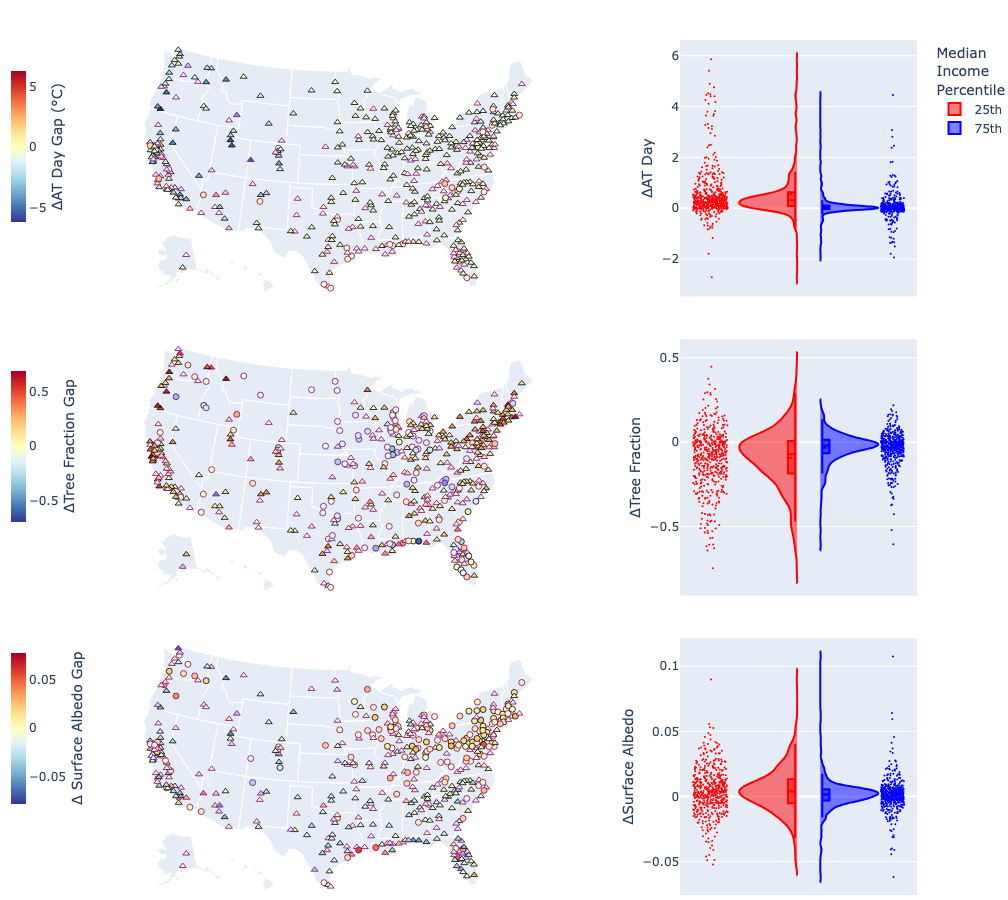

In [16]:
urban_disparity_panel(['$\\Delta$AT Day Gap', '$\\Delta$Tree Fraction Gap', '$\\Delta$Surface Albedo Gap'], 
                      ['\u0394AT Day Gap (\u00b0C)', 
                       '\u0394Tree Fraction Gap', '\u0394 Surface Albedo Gap'], 
                      ['$\\Delta$AT Day', '$\\Delta$Tree Fraction', '$\\Delta$Surface Albedo'],
                      ['\u0394AT Day', '\u0394Tree Fraction', '\u0394Surface Albedo'],
                      #['$\mathrm{\\Delta AT \ Day}$', '$\mathrm{\\Delta Tree \ Fraction}$', '$\mathrm{\\Delta Surface \ Albedo}$'],
                      'at_tree_albedo')

### Night AT, Day LST, and Night LST Anomalies

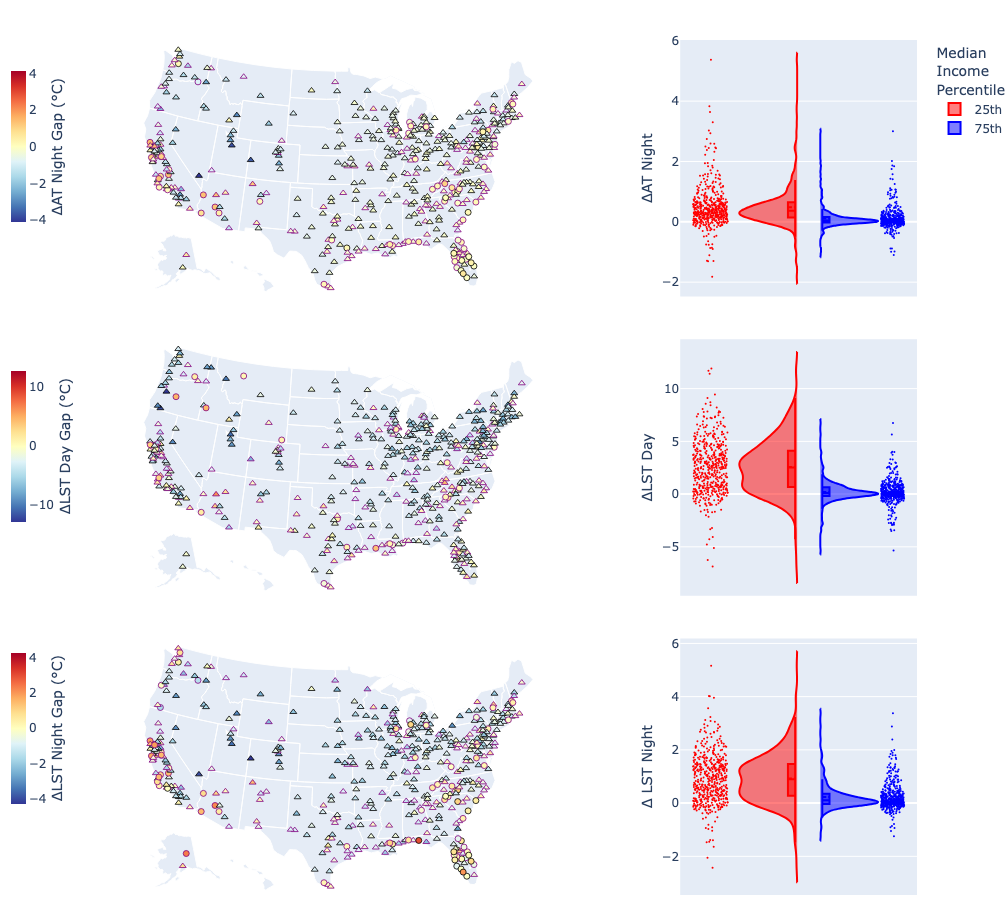

In [17]:
urban_disparity_panel(['$\\Delta$AT Night Gap', '$\\Delta$LST Day Gap', '$\\Delta$LST Night Gap'], 
                      ['\u0394AT Night Gap (\u00b0C)', '\u0394LST Day Gap (\u00b0C)', '\u0394LST Night Gap (\u00b0C)'], 
                      ['$\\Delta$AT Night', '$\\Delta$LST Day', '$\\Delta$LST Night'], 
                      ['\u0394AT Night', '\u0394LST Day', '\u0394 LST Night'],
                      'at_lst')

### Grass Fraction, Built Fraction, and Elevation Anomalies

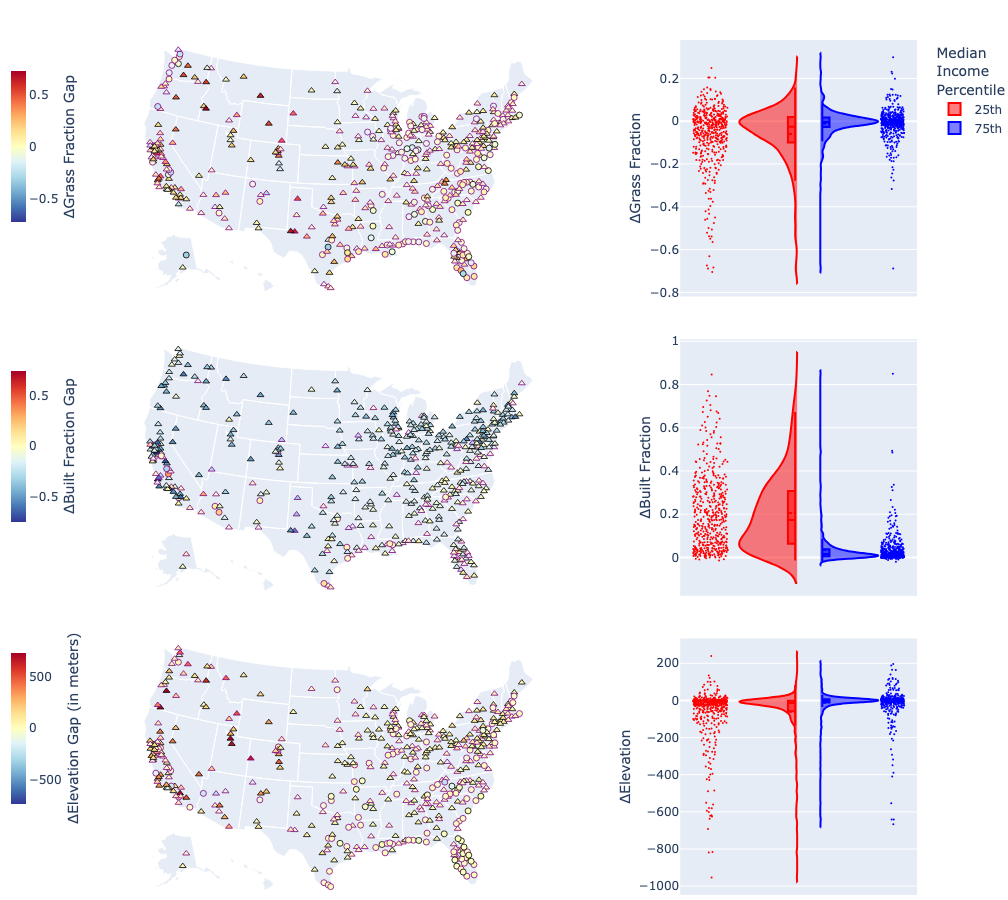

In [18]:
urban_disparity_panel(['$\\Delta$Grass Fraction Gap', '$\\Delta$Built Fraction Gap', '$\\Delta$Elevation Gap'], 
                      ['\u0394Grass Fraction Gap', '\u0394Built Fraction Gap', '\u0394Elevation Gap (in meters)'], 
                      ['$\\Delta$Grass Fraction', '$\\Delta$Built Fraction', '$\\Delta$Elevation'], 
                      ['\u0394Grass Fraction', '\u0394Built Fraction', '\u0394Elevation'],
                      'grass_built_elevation')

### Built Albedo, Tree Albedo, and Grass Albedo Anomalies

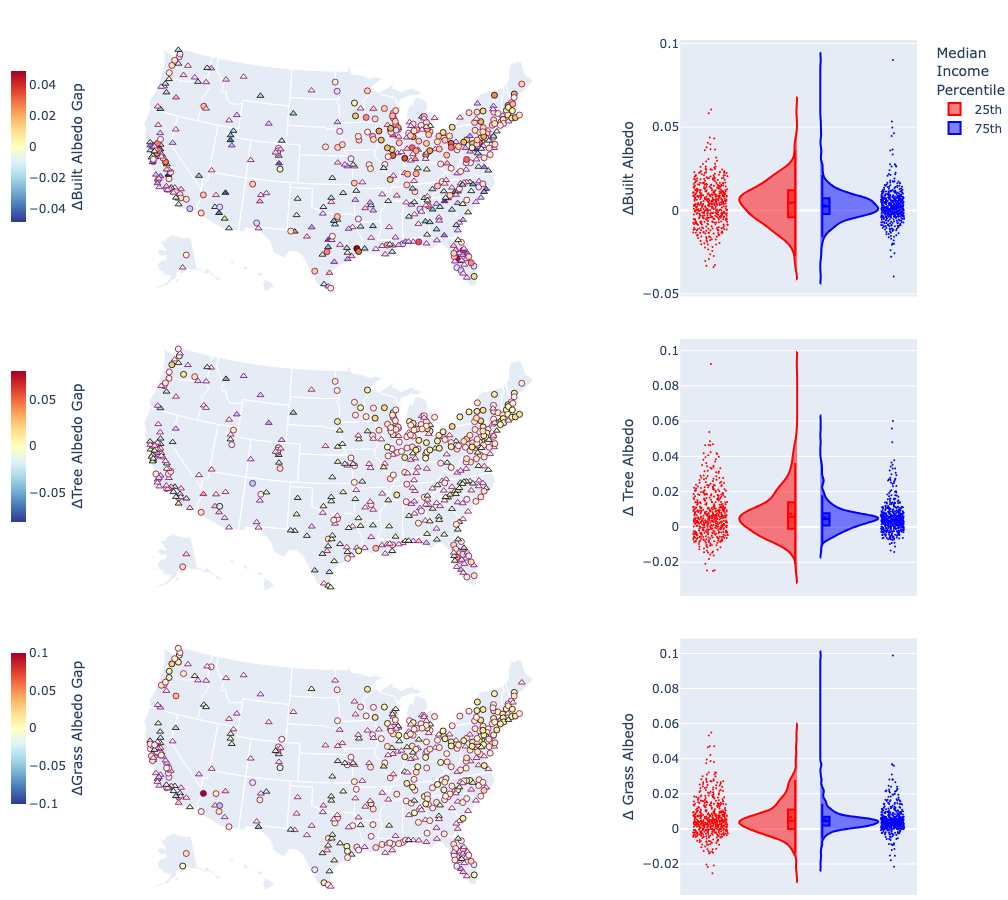

In [19]:
urban_disparity_panel(['$\\Delta$Built Albedo Gap', '$\\Delta$Tree Albedo Gap', '$\\Delta$Grass Albedo Gap'], 
                      ['\u0394Built Albedo Gap', '\u0394Tree Albedo Gap', '\u0394Grass Albedo Gap'], 
                      ['$\\Delta$Built Albedo', '$\\Delta$Tree Albedo', '$\\Delta$Grass Albedo'], 
                      ['\u0394Built Albedo', '\u0394 Tree Albedo', '\u0394 Grass Albedo'],
                      'albedo')

## Annotations

In [20]:
def annotate(features, signs, x25_list, y25_list, x75_list, y75_list, svg_path, save_path):
    #x_list = ['325', '715']
    #x_list = ['435']
    y_list = [['210', '225', '240', '255', '270', '270', '285', '300'], 
              ['510', '525', '540', '555', '570', '570', '585', '600'], 
              ['810', '825', '840', '855', '870', '867', '882', '897']] #'865', '880', '895'
    if features == ['$\\Delta$AT Day', '$\\Delta$Tree Fraction', '$\\Delta$Surface Albedo']:
        x_list = ['430']
    if features == ['$\\Delta$AT Night', '$\\Delta$LST Day', '$\\Delta$LST Night']:
        x_list = ['430']
    if features == ['$\\Delta$Grass Fraction', '$\\Delta$Built Fraction', '$\\Delta$Elevation']:
        x_list = ['425']
    if features == ['$\\Delta$Built Albedo', '$\\Delta$Tree Albedo', '$\\Delta$Grass Albedo']:
        x_list = ['425']
        y_list = [['225', '240', '255', '270', '285', '270', '285', '300'], 
                  ['525', '540', '555', '570', '585', '570', '585', '600'], 
                  ['825', '840', '855', '870', '885', '867', '882', '897']]
        
    #y_list = [['205', '220', '235', '250', '265', '270', '285', '300'], #, '290', '305', '320'], 
    #          ['505', '520', '535', '550', '565', '570', '585', '600'], #'590', '605', '620'], 
    #          ['805', '820', '835', '850', '865', '870', '885', '900']] #'890', '905', '920']]

    text_list = ['Std: {:.3f}', 'Min: {:.3f}', 'Mean: {:.3f}', 'Median: {:.3f}', 'Max: {:.3f}', 
                 '{} cities have', '{} slopes', '(p<0.05 for {})']
    
    tree = etree.parse(svg_path)
    root = tree.getroot()
    
    text_element = etree.Element('text', x='330', y='20', fill='black', style='font-size: 14px; font-family: Verdana;')
    text_element.text = 'Worse for low income group'
    root.append(text_element)
    
    text_element = etree.Element('text', x='330', y='40', fill='black', style='font-size: 14px; font-family: Verdana;')
    text_element.text = 'Worse for high income group'
    root.append(text_element)
    
    circle = etree.SubElement(root, "circle", cx="318", cy="35", r="5.5")
    root.append(circle)
    
    #triangle = etree.Element("polygon", points="318,5 326,20 310,20")
    triangle = etree.Element("polygon", points="318,10 324,20 312,20")
    #triangle = etree.Element("polygon", points="318,5 324,15 312,15")
    #triangle = etree.Element("polygon", points="318,15 324,30 312,30")
    root.append(triangle)
    
    #triangle = etree.Element("polygon", points="100,10 40,190 160,190")
    #root.append(triangle)
    
    idx=0
    for x in x_list:
        for y in y_list:
            # Annotate Overall Difference
            feature = features[idx]
            if feature in ['$\\Delta$Surface Albedo', '$\\Delta$Built Albedo', '$\\Delta$Tree Albedo', '$\\Delta$Grass Albedo']:
                text_list = ['Std: {:.3f}', 'Min: {:.3f}', 'Mean: {:.3f}', 'Median: {:.3f}', 'Max: {:.3f}']
            else:
                text_list = ['Std: {:.2f}', 'Min: {:.2f}', 'Mean: {:.2f}', 'Median: {:.2f}', 'Max: {:.2f}']
            text_list += ['{} cities have', '{} slopes', '(p<0.05 for {})']
            sign = signs[idx]
            col = feature + ' Gap'
            # Add gap standard deviation annotation
            text_element = etree.Element('text', x=x, y=y[0], fill='black', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[0].format( result[col].std() )
            root.append(text_element)
            
            # Add minimum gap annotation
            text_element = etree.Element('text', x=x, y=y[1], fill='black', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[1].format( result[col].min() )
            root.append(text_element)
            
            # Add mean gap annotation
            text_element = etree.Element('text', x=x, y=y[2], fill='black', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[2].format( result[col].mean() )
            root.append(text_element)
            
            # Add median gap annotation
            text_element = etree.Element('text', x=x, y=y[3], fill='black', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[3].format( result[col].median() )
            root.append(text_element)
            
            # Add maximum gap annotation
            text_element = etree.Element('text', x=x, y=y[4], fill='black', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[4].format( result[col].max() )
            root.append(text_element)
            
            # Add slope annotation
            text_element = etree.Element('text', x='300', y=y[5], fill='black', style='font-size: 12px; font-family: Verdana;')
            slope_col = feature + ' Slope'
            if sign == 'neg':
                text_element.text = text_list[5].format(len(result[result[slope_col] < 0]))
            else:
                text_element.text = text_list[5].format(len(result[result[slope_col] > 0]))
            root.append(text_element)
            
            text_element = etree.Element('text', x='300', y=y[6], fill='black', style='font-size: 12px; font-family: Verdana;')
            if sign == 'neg':
                text_element.text = text_list[6].format('negative')
            else:
                text_element.text = text_list[6].format('positive')
            root.append(text_element)
            
            # Add slope annotation
            text_element = etree.Element('text', x='300', y=y[7], fill='black', style='font-size: 12px; font-family: Verdana;')
            pval_col = feature + ' pval'
            if sign == 'neg':
                text_element.text = text_list[7].format(len(result[(result[slope_col] < 0) & (result[pval_col] < 0.05)]))
            else:
                text_element.text = text_list[7].format(len(result[(result[slope_col] > 0) & (result[pval_col] < 0.05)]))
            root.append(text_element)
            
            # Annotate 25th percentile descriptive statistics
            x25 = x25_list[idx]
            y25 = y25_list[idx]
            col25 = feature + ' (25th %tile)'
            text_element = etree.Element('text', x=x25, y=y25[0], fill='red', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[0].format( result[col25].std() )
            root.append(text_element)
            
            text_element = etree.Element('text', x=x25, y=y25[1], fill='red', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[2].format( result[col25].mean() )
            root.append(text_element)
            
            text_element = etree.Element('text', x=x25, y=y25[2], fill='red', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[3].format( result[col25].median() )
            root.append(text_element)
            
            # Annotate 75th percentile descriptive statistics
            x75 = x75_list[idx]
            y75 = y75_list[idx]
            col75 = feature + ' (75th %tile)'
            text_element = etree.Element('text', x=x75, y=y75[0], fill='blue', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[0].format( result[col75].std() )
            root.append(text_element)
            
            text_element = etree.Element('text', x=x75, y=y75[1], fill='blue', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[2].format( result[col75].mean() )
            root.append(text_element)
            
            text_element = etree.Element('text', x=x75, y=y75[2], fill='blue', style='font-size: 12px; font-family: Verdana;')
            text_element.text = text_list[3].format( result[col75].median() )
            root.append(text_element)
            
            idx+=1
    
    refs = ['A', 'C', 'E', 'B', 'D', 'F']
    ref_x_loc = ['85', '565']
    ref_y_loc = ['55', '355', '655']
    idx = 0
    for x in ref_x_loc:
        for y in ref_y_loc:
            text_element = etree.Element('text', x=x, y=y, fill='black', style='font-size: 20px; font-family: Verdana;')
            text_element.text = refs[idx]
            root.append(text_element)
            idx+=1
            
    # Save the modified SVG file
    tree.write(save_path, pretty_print=True, xml_declaration=True, encoding='utf-8')

In [21]:
annotate(features=['$\\Delta$AT Day', '$\\Delta$Tree Fraction', '$\\Delta$Surface Albedo'], 
         signs = ['neg', 'pos', 'neg'],
         #x25_list = ['575', '585', '585'],
         x25_list = ['570', '567', '570'],
         y25_list = [['275', '290', '305'], ['580', '595', '610'], ['675', '690', '705']],
         #y25_list = [['255', '270', '285'], ['340', '355', '370'], ['650', '665', '680']],
         #y25_list = [['45', '60', '75'], ['340', '355', '370'], ['650', '665', '680']],
         x75_list = ['675', '685', '690'],
         y75_list = [['45', '60', '75'], ['560', '575', '590'], ['670', '685', '700']],
         #y75_list = [['45', '60', '75'], ['560', '575', '590'], ['870', '885', '900']],
         svg_path='graphs/gap_panels/at_tree_albedo.svg', 
         save_path='graphs/gap_panels/stats/at_tree_albedo.svg')

In [22]:
annotate(features=['$\\Delta$AT Night', '$\\Delta$LST Day', '$\\Delta$LST Night'], 
         signs = ['neg', 'neg', 'neg'],
         x25_list = ['575', '570', '579'],
         y25_list = [['70', '85', '100'], ['580', '595', '610'], ['655', '670', '685']],
         x75_list = ['670', '670', '670'],
         #y75_list = [['30', '45', '60'], ['350', '365', '380'], ['650', '665', '680']],
         y75_list = [['70', '85', '100'], ['350', '365', '380'], ['655', '670', '685']],
         svg_path='graphs/gap_panels/at_lst.svg', 
         save_path='graphs/gap_panels/stats/at_lst.svg')

In [23]:
annotate(features=['$\\Delta$Grass Fraction', '$\\Delta$Built Fraction', '$\\Delta$Elevation'], 
         signs = ['pos', 'neg', 'pos'],
         x25_list = ['570', '570', '567'], #565
         y25_list = [['285', '300', '315'], ['580', '595', '610'], ['860', '875', '890']], #['700', '715', '730']
         x75_list = ['690', '690', '675'],
         y75_list = [['215', '230', '245'], ['390', '405', '420'], ['850', '865', '880']],
         svg_path='graphs/gap_panels/grass_built_elevation.svg', 
         save_path='graphs/gap_panels/stats/grass_built_elevation.svg')

In [24]:
annotate(features=['$\\Delta$Built Albedo', '$\\Delta$Tree Albedo', '$\\Delta$Grass Albedo'], 
         signs = ['neg', 'neg', 'neg'],
         x25_list = ['565', '572', '575'],
         y25_list = [['75', '90', '105'], ['380', '395', '410'], ['670', '685', '700']], #['265', '280', '295']
         x75_list = ['685', '670', '687'],
         y75_list = [['75', '90', '105'], ['380', '395', '410'], ['670', '685', '700']],
         svg_path='graphs/gap_panels/albedo.svg', 
         save_path='graphs/gap_panels/stats/albedo.svg')